In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
m = 0
c = 0
L = 0.0001 #Learning rate
epoch = 100
epoch_error_list = []
epoch_count_list = []

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [6]:
data.isnull().sum()

size_in_sq_ft     0
price_x1000_sh    0
dtype: int64

In [0]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
N_train = float(len(X_train))
N_test = float(len(X_test))

In [10]:
data['price_x1000_sh'].head()

0    31.707006
1    68.777596
2    62.562382
3    71.546632
4    87.230925
Name: price_x1000_sh, dtype: float64

In [0]:
def mse(N, Y, Y_hat):
  return (1/N)* sum(Y - Y_hat)**2

In [0]:
def gradient_descent_fit(m, c, N, L):
  for i in range(epoch):
    Y_hat = m*X_train + c
    epoch_count_list.append(i)
    epoch_error = mse(N, Y_train, Y_hat)
    epoch_error_list.append(epoch_error)
    D_m = (-2/N) * sum(X_train * (Y_train - Y_hat))
    D_c = (-2/N) * sum(Y_train - Y_hat)
    m = m - (L * D_m)
    c = c - (L * D_c)
  print("Final m is: ",m," and final c is: ",c)
  return Y_hat

Final m is:  1.4864234345458742  and final c is:  0.039137293567562556


[Text(0, 0.5, 'Mean Squared Error')]

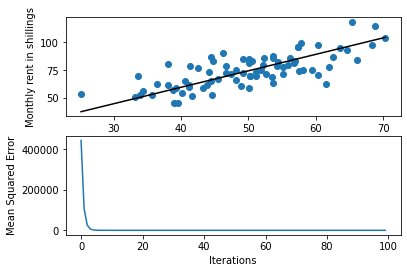

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.scatter(X_train, Y_train)

Y_hat = gradient_descent_fit(m, c, N_train, L)
ax1.plot([min(X_train), max(X_train)], [min(Y_hat), max(Y_hat)], color='black')
ax1.set(xlabel = 'Office size in square feet')
ax1.set(ylabel = 'Monthly rent in shillings')
ax2.plot(epoch_count_list, epoch_error_list)
ax2.set(xlabel = 'Iterations')
ax2.set(ylabel = 'Mean Squared Error')